Questions:
1. 10 rows in sample file don't have EducationID (see rows 614-623). Should I drop it? Or is it special case? 
2. Which field of database have to match EducationID? (First halfs of EducationID are: 
'500', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514'
3. Can I rely on State code instead?
4. Should I add data files (both for Source List and goverment database to github repo? Now it is stored in directory 'Data' with gitignore mark.

In [13]:
import numpy as np
import pandas as pd
import string
import os

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

DATA_DIR = 'Data/'

# Read data

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, 'AR_un_locations.csv'))
print(df.shape)
pd.concat((df.head(3), df.tail(3)), axis=0)

(1846, 23)


,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,Address1,City,...,Market,Industry,StudentCount,LocDesc,LocSquareFootage,LocationZip,Zipnum,COUNTYNM,County,Regions
0,397758056-9.0,9.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,Pine Bluff High School,279283.0,NaN,71601,Jefferson,Jefferson,Timberlands
1,397758056-10.0,10.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,Jack Robey Jr. High School,115073.0,NaN,71601,Jefferson,Jefferson,Timberlands
2,397758056-7.0,7.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,W. T. Cheney Elementary School,59942.0,NaN,71601,Jefferson,Jefferson,Timberlands
1843,465761140-14724.0,14724.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,ZZ Do Not Use All Locations,0.0,NaN,72958,Scott,Scott,Ouachitas
1844,465761140-14720.0,14720.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,Elementary School Campus,99312.0,NaN,72958,Scott,Scott,Ouachitas
1845,465761140-14719.0,14719.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,Middle School Campus,96834.0,NaN,72958,Scott,Scott,Ouachitas


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 23 columns):
un_loc                 1846 non-null object
LociD                  1800 non-null float64
DudeAccountNumber      1846 non-null int64
SalesForceAccountID    1846 non-null object
EducationID            1836 non-null float64
ClientName             1846 non-null object
SchoolDudeReference    1846 non-null int64
PhoneNumber            1846 non-null object
Address1               1846 non-null object
City                   1846 non-null object
State                  1846 non-null object
ZipCode                1846 non-null object
Country                1846 non-null object
Market                 1846 non-null object
Industry               1846 non-null object
StudentCount           1846 non-null int64
LocDesc                1799 non-null object
LocSquareFootage       1780 non-null float64
LocationZip            0 non-null float64
Zipnum                 1846 non-null int64
COUNTYNM        

In [3]:
df.dropna(axis=0, how='any', subset=['EducationID'], inplace=True)
print(df.shape)

(1836, 23)


In [5]:
df.columns

Index(['un_loc', 'LociD', 'DudeAccountNumber', 'SalesForceAccountID',
       'EducationID', 'ClientName', 'SchoolDudeReference', 'PhoneNumber',
       'Address1', 'City', 'State', 'ZipCode', 'Country', 'Market', 'Industry',
       'StudentCount', 'LocDesc', 'LocSquareFootage', 'LocationZip', 'Zipnum',
       'COUNTYNM', 'County', 'Regions'],
      dtype='object')

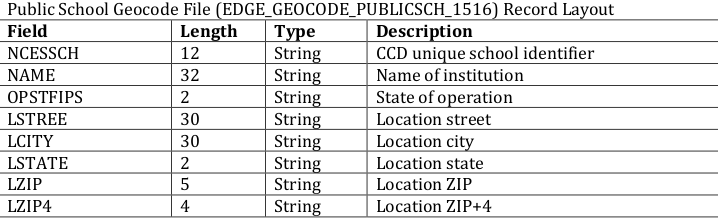

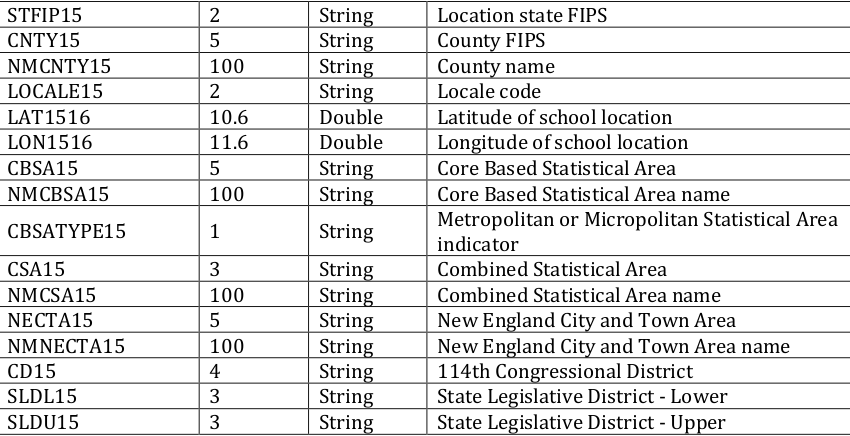

In [4]:
db = pd.read_excel(os.path.join(DATA_DIR, 'EDGE_GEOCODE_PUBLICSCH_1516.xlsx'))
db.NCESSCH = db.NCESSCH.astype(str)
print(db.shape)
pd.concat((db.head(3), db.tail(3)), axis=0)

(102209, 24)


,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,CNTY15,...,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15
0,10000200277,Sequoyah Sch - Chalkville Campus,1,1000 Industrial School Road,Birmingham,AL,35220,M,01,01073,...,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,0106,044,020
1,10000201667,Camps,1,1601 County Rd. 57,Prattville,AL,36067,M,01,01001,...,33860,"Montgomery, AL",1,N,N,N,N,0102,042,030
2,10000201670,Det Ctr,1,2109 Bashi Rd Bldg 509,Thomasville,AL,36784,M,01,01025,...,N,N,N,N,N,N,N,0107,068,024
102206,780003000027,YVONNE BOWSKY ELEMENTARY SCHOOL,78,15B and 16 ESTATE MANDAHL,Saint Thomas,VI,00802,M,78,78030,...,N,N,N,N,N,N,N,7898,N,N
102207,780003000033,CANCRYN JUNIOR HIGH SCHOOL,78,1 CROWN BAY,Saint Thomas,VI,00804,M,78,78030,...,N,N,N,N,N,N,N,7898,N,N
102208,780003000034,BERTHA BOSCHULTE JUNIOR HIGH,78,9 1 and 12A BOVONI,Saint Thomas,VI,00802,M,78,78030,...,N,N,N,N,N,N,N,7898,N,N


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102209 entries, 0 to 102208
Data columns (total 24 columns):
NCESSCH       102209 non-null object
NAME          102209 non-null object
OPSTFIPS      102209 non-null int64
LSTREE        102209 non-null object
LCITY         102209 non-null object
LSTATE        102209 non-null object
LZIP          102209 non-null object
LZIP4         102209 non-null object
STFIP15       102209 non-null object
CNTY15        102209 non-null object
NMCNTY15      102209 non-null object
LOCALE15      102209 non-null object
LAT1516       102209 non-null float64
LON1516       102209 non-null float64
CBSA15        102209 non-null object
NMCBSA15      102209 non-null object
CBSATYPE15    102209 non-null object
CSA15         102209 non-null object
NMCSA15       102209 non-null object
NECTA15       102209 non-null object
NMNECTA15     102209 non-null object
CD15          102209 non-null object
SLDL15        102209 non-null object
SLDU15        102209 non-null object


# Match EducationID to NCESSCH (CCD Unique School Identifier)

In [6]:
print(df.EducationID.unique().shape)
df.EducationID = df.EducationID.astype(str)
df.EducationID = df.EducationID.map(lambda s: s[:-2] if s[-2:]==".0" else s)
print(df.EducationID.str.len().value_counts())
df.EducationID.unique()

(231,)
6    1836
Name: EducationID, dtype: int64


array(['500026', '514140', '505410', '513930', '504800', '505170',
       '505500', '500042', '507710', '508640', '509630', '509840',
       '505470', '500067', '514400', '500028', '500006', '507290',
       '506060', '500032', '511220', '505680', '507110', '507230',
       '508340', '500044', '512510', '512930', '512630', '507840',
       '502580', '503300', '500049', '505340', '506240', '506360',
       '507860', '500065', '509780', '510380', '504110', '513110',
       '511820', '500030', '506420', '508670', '504860', '507890',
       '506690', '502430', '503240', '510980', '507920', '500073',
       '509750', '510170', '509990', '510320', '503770', '508610',
       '500405', '502670', '502700', '502790', '502880', '512570',
       '507320', '505580', '502960', '503480', '503630', '503690',
       '503750', '503960', '510410', '504350', '504410', '504590',
       '505190', '500001', '505850', '506900', '507140', '514370',
       '507530', '514040', '504170', '509060', '509600', '5092

In [7]:
education_ids = set(df.EducationID.unique())
db_district = db[db.NCESSCH.str[0:6].isin(education_ids)]
print(db_district.shape)

(1030, 24)


In [31]:
print(sorted(db_district.LZIP.unique()))

['05456', '71254', '71601', '71602', '71603', '71633', '71635', '71638', '71639', '71640', '71646', '71647', '71652', '71653', '71654', '71655', '71665', '71667', '71671', '71676', '71701', '71720', '71730', '71743', '71744', '71749', '71753', '71759', '71762', '71763', '71765', '71771', '71801', '71822', '71825', '71832', '71833', '71836', '71837', '71842', '71845', '71851', '71852', '71854', '71857', '71858', '71860', '71875', '71901', '71913', '71921', '71923', '71929', '71937', '71940', '71941', '71943', '71949', '71953', '71956', '71957', '71958', '71960', '71961', '71964', '71971', '71972', '71973', '72002', '72006', '72010', '72011', '72012', '72013', '72015', '72016', '72020', '72021', '72022', '72023', '72024', '72027', '72029', '72031', '72032', '72034', '72040', '72042', '72046', '72047', '72053', '72055', '72058', '72061', '72063', '72064', '72067', '72076', '72081', '72082', '72086', '72101', '72103', '72104', '72106', '72110', '72111', '72112', '72113', '72114', '72116', 

# Match State 
To speed up matching

In [7]:
db_ar = db[db.LSTATE=='AR']
print(db_ar.shape)

(1111, 24)


# Normalize sample data
normalize an excel file that has school addresses including address, city, state, zip by standardizing on common USPS abbreviations and small caps

see https://stackoverflow.com/questions/44725712/replace-function-with-dictionary/44725831#44725831
and http://bcdcspatial.blogspot.ru/2012/09/normalize-to-usps-street-abbreviations.html

In [18]:
def load_abbreviations(fname='usps.csv'):
    """
    load abbreviation from file fname
    return dictinary {pattern : replacement}
    """
    usps = pd.read_csv(fname, index_col='pattern')
    return usps.replacement.to_dict()

USPS = load_abbreviations('usps.csv')

def handle_strings(x, exclude=set(string.punctuation)):
    """
    Helper function to make string all caps and remove punctuation.
    
    x: any string
    """
    x = ''.join(ch for ch in x if ch not in exclude)
    return x

def normalizeStreetSuffixes(inputValue,case='u'):
        '''
        if case=='l', returns lowercase
        if case=='u', returns uppercase
        else returns proper case
        '''
        case = case[0].lower()
        abbv = USPS
        words = inputValue.split()
        for i,word in enumerate(words):
            w = handle_strings(word.lower())
            rep = abbv[w] if w in abbv.keys() else handle_strings(words[i])
            words[i] = rep.upper() if case == 'u' else rep.lower() if case == 'l' else (rep[0].upper() + rep[1:])
        return ' '.join(words)
s = '1020 W. Holland Avenue.'
print("%s -> %s" % (s, normalizeStreetSuffixes(s)))

1020 W. Holland Avenue. -> 1020 W HOLLAND AVE


In [19]:
df['normAddress'] = df.Address1.map(normalizeStreetSuffixes)

In [53]:
df_norm = pd.DataFrame(df.Address1.unique(), columns=['Original'])
df_norm['Normalized'] = df_norm.Original.map(normalizeStreetSuffixes)
df_norm.to_csv('sample_normalized.csv', index=False)
df_norm.head()

,Original,Normalized
0,512 Pine Street,512 PNE ST
1,1020 W. Holland Ave.,1020 W HOLLAND AVE
2,4900 Dollarway Road,4900 DOLLARWAY RD
3,4100 Camden Road,4100 CAMDEN RD
4,219 Main,219 MAIN


# Match 1 example

In [26]:
row_num = 7
row = df.iloc[row_num, :]
print(df.columns.values)
print(db_district.columns.values)
df.iloc[row_num : row_num + 1, :]

['un_loc' 'LociD' 'DudeAccountNumber' 'SalesForceAccountID' 'EducationID'
 'ClientName' 'SchoolDudeReference' 'PhoneNumber' 'Address1' 'City' 'State'
 'ZipCode' 'Country' 'Market' 'Industry' 'StudentCount' 'LocDesc'
 'LocSquareFootage' 'LocationZip' 'Zipnum' 'COUNTYNM' 'County' 'Regions'
 'normAddress']
['NCESSCH' 'NAME' 'OPSTFIPS' 'LSTREE' 'LCITY' 'LSTATE' 'LZIP' 'LZIP4'
 'STFIP15' 'CNTY15' 'NMCNTY15' 'LOCALE15' 'LAT1516' 'LON1516' 'CBSA15'
 'NMCBSA15' 'CBSATYPE15' 'CSA15' 'NMCSA15' 'NECTA15' 'NMNECTA15' 'CD15'
 'SLDL15' 'SLDU15']


,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,Address1,City,...,Industry,StudentCount,LocDesc,LocSquareFootage,LocationZip,Zipnum,COUNTYNM,County,Regions,normAddress
7,397758056-8.0,8.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,4944,Southeast Middle School,79000.0,NaN,71601,Jefferson,Jefferson,Timberlands,512 PNE ST


In [47]:
def concatenate_sample_fields(row):
    return " ".join([str(row.State), str(row.City), str(row.ZipCode), 
                     str(row.normAddress), str(row.LocDesc)]).upper()
query = concatenate_sample_fields(row)
query

'AR WALDRON 72958-1397 1560 W SIXTH ST MIDDLE SCHOOL CAMPUS'

In [54]:
def concatenate_db_fields(row):
    return " ".join([str(row.LSTATE), str(row.LCITY), str(row.LZIP), 
                     str(row.LSTREE), str(row.NAME)]).upper()
db_rows = [concatenate_db_fields(row) for i, row in db_district.iterrows()]

In [34]:
print(query)
process.extractBests(query, db_rows)

AR PINE BLUFF 71601 512 PNE ST SOUTHEAST MIDDLE SCHOOL


[('AR PINE BLUFF 71601 2001 OHIO ST SOUTHEAST MIDDLE SCHOOL', 89),
 ('AR LITTLE ROCK 72202 907 MARTIN LUTHER KING JR BLVD M.L. KING MAGNET ELEM. SCHOOL',
  86),
 ('AR SILOAM SPRINGS 72761 1500 NORTH MT OLIVE STREET SILOAM SPRINGS INTERMEDIATE SCHO',
  86),
 ('AR PINE BLUFF 71601 711 W 11TH ST PINE BLUFF HIGH SCHOOL', 74),
 ('AR PINE BLUFF 71602 2602 FLUKER ST ROBERT F MOREHEAD MIDDLE SCHOO', 72)]

In [36]:
best = process.extractOne(query, db_rows)

In [38]:
idx = db_rows.index(best[0])
db_district.iloc[idx:idx+1, :]

,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,CNTY15,...,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15
4504,50002600870,SOUTHEAST MIDDLE SCHOOL,5,2001 OHIO ST,PINE BLUFF,AR,71601,M,05,05069,...,38220,"Pine Bluff, AR",1,340,"Little Rock-North Little Rock, AR",N,N,0504,016,025


# Match all samples

In [51]:
df['Query'] = [concatenate_sample_fields(row) for i, row in df.iterrows()]
df.sort_values('EducationID', inplace=True)

In [63]:
result = []
prev_eduid = None
for un_loc, query, eduid in zip(df.un_loc, df.Query, df.EducationID):
    if eduid != prev_eduid:
        prev_eduid = eduid
        db_district = db[db.NCESSCH.str[0:6]==eduid]
        db_rows = [concatenate_db_fields(row) for i, row in db_district.iterrows()]
    best = process.extractOne(query, db_rows)
    if best is None:
        result.append(('', 0, un_loc))
    else:
        idx = db_rows.index(best[0])
        ncessch = db_district.NCESSCH.iloc[idx]
        result.append((ncessch, best[1], un_loc))
print(len(result))

1836


In [80]:
df_res = pd.DataFrame(result, columns=['NCESSCH', 'Score', 'un_loc'])
print(df_res.shape)
df_res.head()

(1836, 3)


,NCESSCH,Score,un_loc
0,50002600867,88,397758056-9.0
1,50002601338,87,397758056-10.0
2,50002601404,83,397758056-7.0
3,50002600857,86,397758056-15.0
4,50002600871,89,397758056-6.0


In [81]:
print((df_res.Score==0).sum())
np.histogram(df_res.Score)

0


(array([ 17,  78, 176, 131, 232, 272, 382, 407,  82,  59]),
 array([  45. ,   50.5,   56. ,   61.5,   67. ,   72.5,   78. ,   83.5,
          89. ,   94.5,  100. ]))

In [82]:
df_res = pd.merge(df_res, df.drop(['normAddress', 'Query'], axis=1), on='un_loc', how='left')
df_res = pd.merge(df_res, db, on='NCESSCH', how='left')
print(df_res.shape)
df_res.to_csv('sample_match.csv', index=False)
df_res.head()

(1836, 48)


,NCESSCH,Score,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,...,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15
0,50002600867,88,397758056-9.0,9.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,...,38220,"Pine Bluff, AR",1,340,"Little Rock-North Little Rock, AR",N,N,0504,017,025
1,50002601338,87,397758056-10.0,10.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,...,38220,"Pine Bluff, AR",1,340,"Little Rock-North Little Rock, AR",N,N,0504,016,025
2,50002601404,83,397758056-7.0,7.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,...,38220,"Pine Bluff, AR",1,340,"Little Rock-North Little Rock, AR",N,N,0504,016,027
3,50002600857,86,397758056-15.0,15.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,...,38220,"Pine Bluff, AR",1,340,"Little Rock-North Little Rock, AR",N,N,0504,016,025
4,50002600871,89,397758056-6.0,6.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,...,38220,"Pine Bluff, AR",1,340,"Little Rock-North Little Rock, AR",N,N,0504,016,025
